# Exploratory Data Analysis (EDA) on the Global Terrorism Dataset,

In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Dataset
df = pd.read_csv('dataset/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1') 

In [3]:
# Display first few rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
# Summary statistics
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## 2. Data Cleaning and Preprocessing

The dataset contains several columns that are not useful for this analysis. We’ll remove these, handle missing values, and ensure the data is clean.

In [6]:
# Drop irrelevant columns
df = df.drop(['eventid', 'summary', 'related'], axis=1)

In [7]:
# Check for missing values
df.isnull().sum()

iyear              0
imonth             0
iday               0
approxdate    172452
extended           0
               ...  
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
Length: 132, dtype: int64

In [8]:
# Fill missing values for 'nkill' and 'nwound' (number of people killed/wounded) with 0
df['nkill'].fillna(0, inplace=True)
df['nwound'].fillna(0, inplace=True)

In [9]:
# Drop rows with missing latitude/longitude (for geographic analysis)
df_geo = df.dropna(subset=['latitude', 'longitude'])

## 3. Exploratory Data Analysis (EDA)

### 3.1. Terrorism Trends Over Time

We can analyze how the number of terrorist attacks has changed over the years.

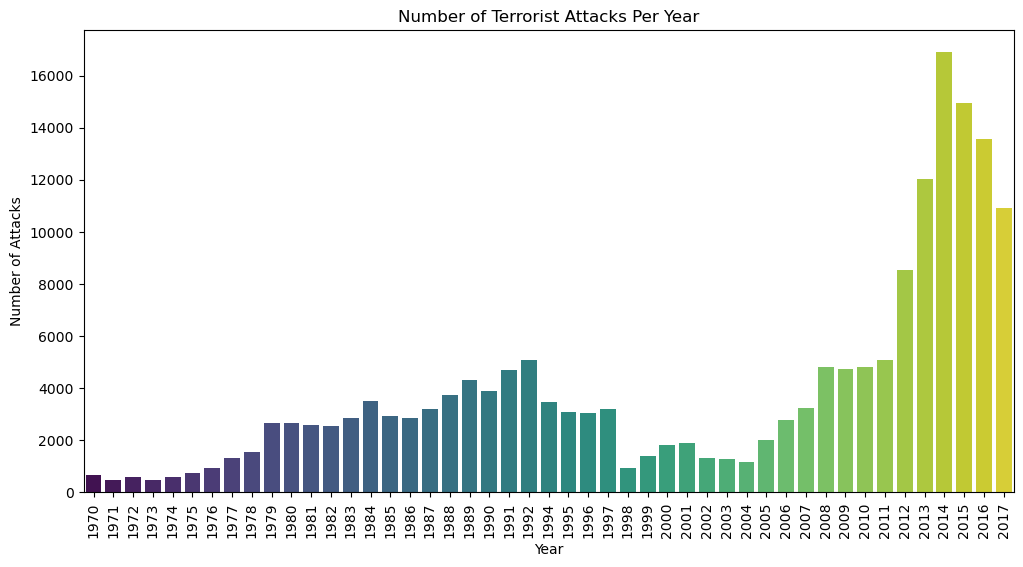

In [10]:
# Plot the number of attacks per year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='iyear', palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Terrorist Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

#### Explanation:

This plot shows the number of terrorist attacks each year, allowing us to identify if the frequency of terrorism has increased or decreased over time.


### 3.2. Terrorism by Region
To identify the most affected regions, we will create a count plot for the regions.

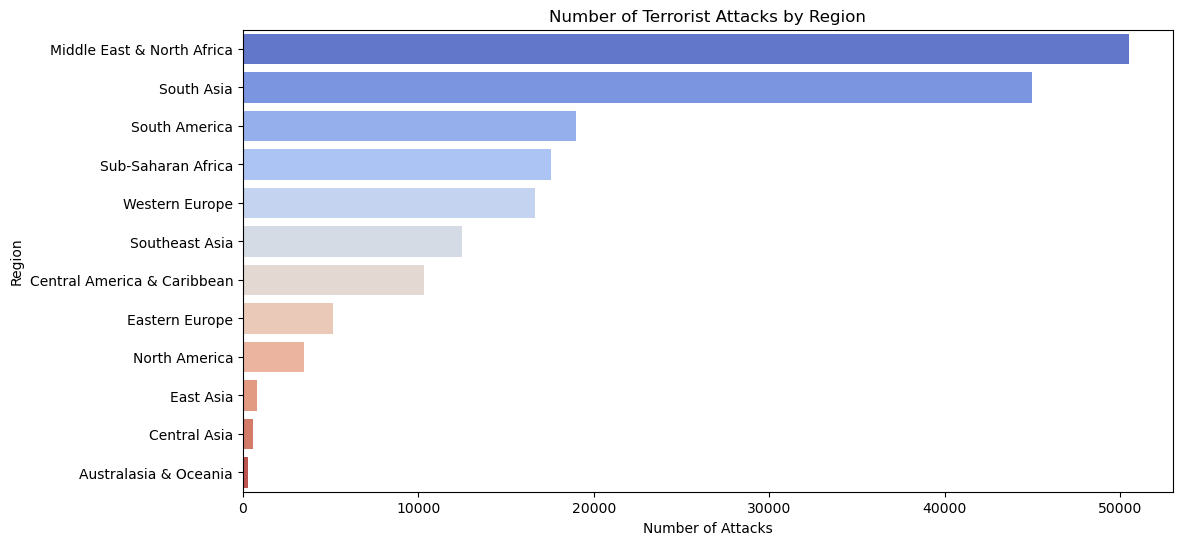

In [11]:
# Plot number of attacks by region
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='region_txt', palette='coolwarm', order=df['region_txt'].value_counts().index)
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

#### Explanation:

This graph will highlight which regions experience the highest number of terrorist attacks which is in this case the middle east and north africa.